# Note: 
This script of building csv from NetCDF should be run once each time, becauce cells of conversion of variables can be repeat thier results and upgrding the outcomes which could lead to misleading results.

https://stackoverflow.com/questions/50506347/operation-along-year-with-xarray

In the below link: Organizing daily Excel data into xarray dataset  (There is a nice 3-D figure represents the N-Data array)

https://stackoverflow.com/questions/41904951/organizing-daily-excel-data-into-xarray-dataset

https://medium.com/pangeo/step-by-step-guide-to-building-a-big-data-portal-e262af1c2977

https://stackoverflow.com/questions/40544846/read-multiple-coordinates-with-xarray

http://stephanhoyer.com/2015/06/11/xray-dask-out-of-core-labeled-arrays/

You might pass your data off to pandas for further analysis in tabular form: https://xray.readthedocs.io/en/stable/pandas.html

http://stephanhoyer.com/2015/06/11/xray-dask-out-of-core-labeled-arrays/#fn:1

For distributed computation that lets us automatically parallelize grouped operations written like:

s.groupby('some variable').apply(f),  where f is a function on NumPy arrays.

Merging NetCDF files:

https://stackoverflow.com/questions/47226429/join-merge-multiple-netcdf-files-using-xarray


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import datetime as dt
import matplotlib.pyplot as plt
import pvlib
# from pvlib.forecast import GFS, NAM, NDFD, HRRR, RAP

In [2]:
###http://stephanhoyer.com/2015/06/11/xray-dask-out-of-core-labeled-arrays/

# ds=xr.open_dataset('Hokk_Ens_Aggreg_S1_S2_2017_2018.nc')  #This data with latitude=43

ds1=xr.open_dataset('Hokk_Ens_Agg_lat42_44_12vars_2016.nc')  #This data with latitude=43

ds2=xr.open_dataset('Hokk_Ens_Agg_lat42_44_2017_2018.nc')  #This data with latitude ranges 42-44

# ds=xr.open_dataset('Hokk_Ens_Agg_lat42_44_inclHR_2016.nc')#latitude ranges 42-44, but unfortunately no HR archive exist

# ds=xr.open_dataset('Hokk_Ens_Agg_lat42_44_inclHR_2017_18.nc')#atitude ranges 42-44 #latitude ranges 42-44, but unfortunately no HR archive exist

# ds.sel(time='2017-1-1').max(['latitude', 'longitude']) 

# ds.sel(time='2016-1-1').max(['latitude', 'longitude'])

ds = xr.merge([ds1,ds2])

# ds1
# ds2
ds

<xarray.Dataset>
Dimensions:    (latitude: 5, longitude: 9, number: 10, time: 8768)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01 ... 2018-12-31T21:00:00
  * longitude  (longitude) float32 141.0 141.5 142.0 142.5 ... 144.0 144.5 145.0
  * latitude   (latitude) float32 44.0 43.5 43.0 42.5 42.0
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9
Data variables:
    u10        (time, number, latitude, longitude) float32 5.813078 ... 9.216344
    v10        (time, number, latitude, longitude) float32 -7.009826 ... 0.062258005
    t2m        (time, number, latitude, longitude) float32 272.64948 ... 274.64325
    asn        (time, number, latitude, longitude) float32 0.88000214 ... 0.8800024
    sd         (time, number, latitude, longitude) float32 7.450581e-09 ... 0.0
    ssrdc      (time, number, latitude, longitude) float32 620576.0 ... 0.0
    ssrd       (time, number, latitude, longitude) float32 407486.0 ... 0.0
    tcc        (time, number, latitude, longitude) float32 0

# Data Variables:
"10m_u_component_of_wind", "10m_v_component_of_wind", "2m_temperature", "snow_albedo", "snow_depth", "surface_solar_radiation_downward_clear_sky", "surface_solar_radiation_downwards", "total_cloud_cover", "total_column_cloud_ice_water", "total_column_cloud_liquid_water", "total_precipitation"

Data variables, they are described with their units as in: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview

https://cds.climate.copernicus.eu/cdsapp#!/yourrequests?tab=form

https://apps.ecmwf.int/codes/grib/param-db  (to know which variables with accumulated values)

In [3]:
vars=['u10', 'v10', 't2m', 'asn', 'sd', 'ssrdc', 'ssrd', 'tcc', 'tciw', 'tclw', 'tp']
len(vars)

11

In [4]:
ds_ens = xr.concat([ds[vars]], dim = 'number')
ds_mean=ds_ens.groupby('time').mean(xr.ALL_DIMS)
ds_max=ds_ens.groupby('time').max(xr.ALL_DIMS)
ds_min=ds_ens.groupby('time').min(xr.ALL_DIMS)

ds_mean=ds_mean.to_dataframe()
ds_max=ds_max.to_dataframe()
ds_min=ds_min.to_dataframe()


In [5]:
ds_max.head()
ds_min.head()
ds_mean.head()

# var_mean.describe()

,u10,v10,t2m,asn,sd,ssrdc,ssrd,tcc,tciw,tclw,tp
time,,,,,,,,,,,
2016-01-01 00:00:00,3.886250,-2.851480,269.501862,0.827843,0.015721,8.118321e+05,7.034049e+05,0.485168,0.011588,0.002629,0.000096
2016-01-01 03:00:00,4.932747,-4.198853,271.775543,0.827589,0.015767,3.977169e+06,3.442835e+06,0.751851,0.028697,0.006843,0.000118
2016-01-01 06:00:00,4.844539,-3.502080,271.486176,0.827372,0.015781,3.176268e+06,2.446900e+06,0.836149,0.016325,0.016921,0.000110
2016-01-01 09:00:00,4.449503,-2.028370,270.332581,0.826932,0.015789,1.810985e+05,1.316305e+05,0.660479,0.010685,0.025483,0.000062
2016-01-01 12:00:00,3.681740,-0.185882,269.666321,0.828510,0.015821,0.000000e+00,0.000000e+00,0.634584,0.010211,0.019844,0.000064


In [6]:
from pvlib.forecast import GFS
model = GFS()
for vr in ['mean', 'max', 'min']:
    dtc = model.kelvin_to_celsius(eval('ds_'+vr)['t2m'])
    eval('ds_'+vr)['t2m']=dtc

# print([t2m_cmax.describe(),t2m_cmin.describe(),t2m_cmean.describe()])

C:\Users\Mhdella\Anaconda3\lib\site-packages\pvlib\forecast.py:21: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  'The API may change, the functionality may be consolidated into an io ' +


In [7]:
for vr in ['mean', 'max', 'min']:
    dw=eval('ds_'+vr)[['u10', 'v10']]
    dw= {'wind_speed_u': eval('ds_'+vr)['u10'],'wind_speed_v': eval('ds_'+vr)[ 'v10']}
    eval('ds_'+vr)['wind_speed'] = model.uv_to_speed(dw)


ds_mean['wind_speed'].describe()

count    8768.000000
mean        3.920657
std         2.023250
min         0.051147
25%         2.475587
50%         3.639986
75%         5.059705
max        12.768033
Name: wind_speed, dtype: float64

In [8]:
resampled_data_mean = ds_mean.resample('30min').interpolate()
resampled_data_max = ds_max.resample('30min').interpolate()
resampled_data_min = ds_min.resample('30min').interpolate()

# resampled_data_mean.head()
resampled_data_mean.describe()
# resampled_data_max.describe()
# resampled_data_min.describe()

,u10,v10,t2m,asn,sd,ssrdc,ssrd,tcc,tciw,tclw,tp,wind_speed
count,52603.000000,52603.000000,52603.000000,52603.000000,52603.000000,52603.000,5.260300e+04,52603.000000,5.260300e+04,5.260300e+04,52603.000000,52603.000000
mean,1.388805,0.262445,7.254982,0.853819,0.014648,2340057.000,1.635652e+06,0.669190,3.462344e-02,6.815804e-02,0.000451,3.920611
std,3.148145,2.705509,8.974607,0.032772,0.023334,2815679.000,2.130806e+06,0.270902,5.547108e-02,1.033799e-01,0.001031,1.998472
min,-12.133279,-11.647539,-13.074158,0.724005,0.000000,0.000,0.000000e+00,0.000487,-5.960464e-08,5.960464e-08,0.000000,0.051147
25%,-0.862193,-1.526619,-0.802401,0.833879,0.000000,0.000,0.000000e+00,0.462420,4.239187e-03,5.530087e-03,0.000026,2.484281
50%,1.376863,0.326169,7.629466,0.869749,0.000059,840559.250,5.363727e+05,0.703819,1.441982e-02,2.332139e-02,0.000114,3.646500
75%,3.548406,2.162619,15.217596,0.880001,0.023718,4193036.625,2.777263e+06,0.927705,3.687242e-02,8.691316e-02,0.000338,5.055098
max,12.677865,10.990670,25.894714,0.880003,0.092181,9906970.000,9.741109e+06,1.000000,5.546996e-01,8.629423e-01,0.018570,12.768033


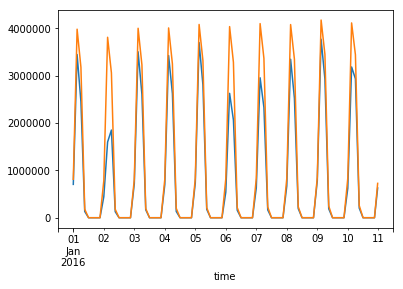

In [9]:
# df_plt=resampled_data.loc['2017-1-1':'2017-1-10']
df_plt=resampled_data_mean.loc['2016-1-1':'2016-1-10']
# df_plt=resampled_data_max.loc['2016-1-1':'2016-1-10']
# df_plt=resampled_data_min.loc['2016-1-1':'2016-1-10']

df_plt['ssrd'].plot()
df_plt['ssrdc'].plot()

https://apps.ecmwf.int/codes/grib/param-db  (to know which variables with accumulated values)

https://confluence.ecmwf.int/pages/viewpage.action?pageId=111155330

These are the variables that attributed with accumulated fields:

"snow_depth", "surface_solar_radiation_downward_clear_sky", "surface_solar_radiation_downwards",  "total_precipitation"
vars=['sd', 'ssrdc', 'ssrd', 'tp']


In [10]:
for vr in ['mean', 'max', 'min']:
    df_acc=eval('resampled_data_'+vr)[['ssrdc', 'ssrd']]
    eval('resampled_data_'+vr)[['ssrdc', 'ssrd']]=df_acc/(3*3600)
    
# df_acc
print(df_acc.head(9))

                          ssrdc          ssrd
time                                         
2016-01-01 00:00:00   619049.50  3.284630e+05
2016-01-01 00:30:00  1127672.50  5.962803e+05
2016-01-01 01:00:00  1636295.50  8.640977e+05
2016-01-01 01:30:00  2144918.50  1.131915e+06
2016-01-01 02:00:00  2653541.50  1.399732e+06
2016-01-01 02:30:00  3162164.50  1.667550e+06
2016-01-01 03:00:00  3670787.50  1.935367e+06
2016-01-01 03:30:00  3525604.75  1.852426e+06
2016-01-01 04:00:00  3380422.00  1.769486e+06


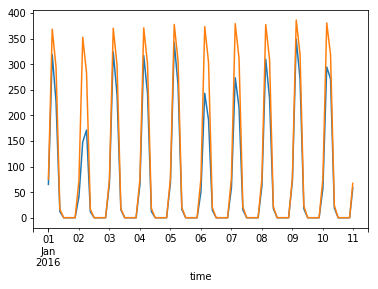

In [11]:
# df_plt=df_avg.loc['2017-1-1':'2017-1-10']
# df_plt=ds_avg.loc['2016-1-1':'2016-1-10']
df_plt=resampled_data_mean.loc['2016-1-1':'2016-1-10']
# df_plt=resampled_data_max.loc['2016-1-1':'2016-1-10']
# df_plt=resampled_data_min.loc['2016-1-1':'2016-1-10']


df_plt['ssrd'].plot()
df_plt['ssrdc'].plot()

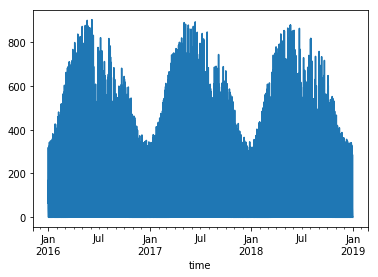

In [12]:
# df_plt=resampled_data['2017-1-1':'2018-12-31']
df_plt=resampled_data_mean['2016-1-1':'2018-12-31']
# # df_plt=resampled_data_max['2016-1-1':'2018-12-31']
# # df_plt=resampled_data_min['2016-1-1':'2018-12-31']

df_plt['ssrd'].plot()
# df_plt['ssrdc'].plot()

In [13]:
resampled_data= pd.concat([resampled_data_mean, resampled_data_max, resampled_data_min], axis=1)
len(resampled_data)
# len(resampled_data_max)
# len(resampled_data.columns)
resampled_data.head()
# resampled_data.describe()
# list(resampled_data)

,u10,v10,t2m,asn,sd,ssrdc,ssrd,tcc,tciw,tclw,...,t2m,asn,sd,ssrdc,ssrd,tcc,tciw,tclw,tp,wind_speed
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,3.886250,-2.851480,-3.648132,0.827843,0.015721,75.169632,65.130089,0.485168,0.011588,0.002629,...,-13.909399,0.600965,7.450581e-09,57.319398,30.413241,0.000000,0.000000,0.000000,0.000000e+00,7.704484
2016-01-01 00:30:00,4.060666,-3.076042,-3.269185,0.827800,0.015729,124.017433,107.405243,0.529615,0.014439,0.003331,...,-12.694835,0.600870,7.450581e-09,104.414120,55.211142,0.037510,0.000396,0.000011,2.694627e-07,7.772519
2016-01-01 01:00:00,4.235083,-3.300604,-2.890239,0.827758,0.015737,172.865219,149.680389,0.574062,0.017291,0.004034,...,-11.480271,0.600775,7.450581e-09,151.508843,80.009043,0.075021,0.000793,0.000023,5.389253e-07,7.840554
2016-01-01 01:30:00,4.409499,-3.525166,-2.511292,0.827716,0.015744,221.713013,191.955551,0.618509,0.020142,0.004736,...,-10.265707,0.600680,7.450581e-09,198.603565,104.806944,0.112531,0.001189,0.000034,8.083880e-07,7.908589
2016-01-01 02:00:00,4.583915,-3.749728,-2.132344,0.827674,0.015752,270.560822,234.230713,0.662956,0.022994,0.005438,...,-9.051143,0.600586,7.450581e-09,245.698287,129.604846,0.150041,0.001585,0.000046,1.077851e-06,7.976625


In [14]:
res_dx=pd.to_datetime(resampled_data.index.strftime('%Y-%m-%d %H:%M:%S'))
res_dx_utc=res_dx.tz_localize('UTC')
res_jp=res_dx_utc.tz_convert('Japan')
form_res_jp=res_jp.strftime('%Y-%m-%d %H:%M:%S')
# print(res_dx)
# print(res_dx_utc)
# print(res_jp)
# print(form_res_jp)

In [15]:
resampled_data.insert(0, 'DATE', res_jp.date)
resampled_data.insert(1, 'TIME', res_jp.time)

resampled_data.head()

,DATE,TIME,u10,v10,t2m,asn,sd,ssrdc,ssrd,tcc,...,t2m,asn,sd,ssrdc,ssrd,tcc,tciw,tclw,tp,wind_speed
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2016-01-01,09:00:00,3.886250,-2.851480,-3.648132,0.827843,0.015721,75.169632,65.130089,0.485168,...,-13.909399,0.600965,7.450581e-09,57.319398,30.413241,0.000000,0.000000,0.000000,0.000000e+00,7.704484
2016-01-01 00:30:00,2016-01-01,09:30:00,4.060666,-3.076042,-3.269185,0.827800,0.015729,124.017433,107.405243,0.529615,...,-12.694835,0.600870,7.450581e-09,104.414120,55.211142,0.037510,0.000396,0.000011,2.694627e-07,7.772519
2016-01-01 01:00:00,2016-01-01,10:00:00,4.235083,-3.300604,-2.890239,0.827758,0.015737,172.865219,149.680389,0.574062,...,-11.480271,0.600775,7.450581e-09,151.508843,80.009043,0.075021,0.000793,0.000023,5.389253e-07,7.840554
2016-01-01 01:30:00,2016-01-01,10:30:00,4.409499,-3.525166,-2.511292,0.827716,0.015744,221.713013,191.955551,0.618509,...,-10.265707,0.600680,7.450581e-09,198.603565,104.806944,0.112531,0.001189,0.000034,8.083880e-07,7.908589
2016-01-01 02:00:00,2016-01-01,11:00:00,4.583915,-3.749728,-2.132344,0.827674,0.015752,270.560822,234.230713,0.662956,...,-9.051143,0.600586,7.450581e-09,245.698287,129.604846,0.150041,0.001585,0.000046,1.077851e-06,7.976625


In [16]:
### resampled_data.to_csv('Hokk_Ens_Agg_Res_Jp_lat43_2017_18.csv')  #just 1 latitude 43
### resampled_data.to_csv('Hokk_Ens_Agg_Res_Jp_lat42_44_2017_18.csv') #here latitude ranges from 42-44
### resampled_data.to_csv('Hokk_Ens_Agg_Res_Jp_lat42_44_2016.csv')  #here latitude ranges from 42-44

### resampled_data.to_csv('Hokk_mena_max_min_Res_Jp_lat42_44_2016-2018.csv')  #aggreg mean, max, min, 2016-2017-2018

